<h1 align='left' style='color:purple'>Clustering With K Means </h1>

<img src="kmean.png" width="400" height="200" />

1. Here our k is 2 so we place 2 random cluster ,then cluster will color the points with its own color,and it will shift to the center of both dataset. 
2. Then again it will test distance and again will shift to center 
3. It will do the same activity untill there is nodatasets to change bcz of distance

<img src="kmean2.png" width="400" height="200" />

1. Here we calculate SSE(sum of squared error)based on number of cluster(K) ,
2. for ex if there is 2 cluster clacluate 2 SSE and of there is 5 cluster claculate 5 SSE

<img src="kmean4.png" width="400" height="200" />

1. Then we place this SSE in chart like shown above (where here 11 cluster (k) is there ) 
2. and as per the elbow technique find out the good K number which is 4 in the above picture 

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv('income.csv')

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

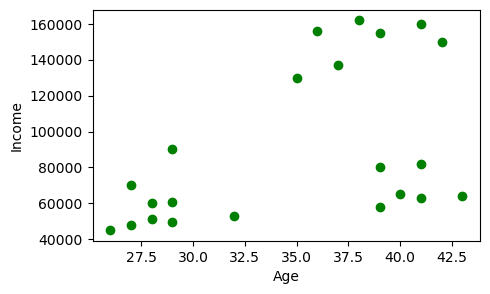

In [17]:
plt.figure(figsize=(5,3))
plt.scatter(df.Age,df['Income($)'],color='Green')
plt.xlabel('Age')
plt.ylabel('Income')

In [63]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=10) # n_init is number of time cluster will run with different centroid seeds
#By default n_init is 10 
km

KMeans(n_clusters=3, n_init=10)

In [98]:
#Centroid of the cluster
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [66]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [71]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


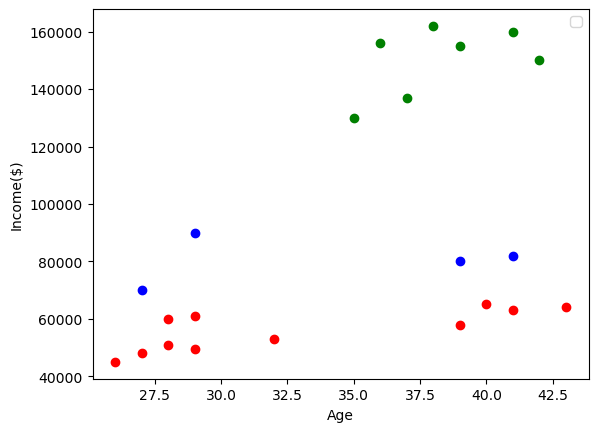

In [79]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='Green')
plt.scatter(df2['Age'],df2['Income($)'],color='Red')
plt.scatter(df3['Age'],df3['Income($)'],color='Blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [87]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()  # Convert Income from 0 to 1 to make it able to analyze properly with age

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()  # Convert Age from 0 to 1 to make it able to analyze properly with Income


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [88]:
km=KMeans(n_clusters=3,n_init=10)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [99]:
#Centroid of the clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [91]:
df['Cluster2']=y_predicted
df.head()

,Name,Age,Income($),cluster,Cluster2
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,1,0
3,Ismail,0.117647,0.128205,1,0
4,Kory,0.941176,0.897436,0,2


In [94]:
df.drop('cluster',axis='columns',inplace=True)
df.head()

,Name,Age,Income($),Cluster2
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


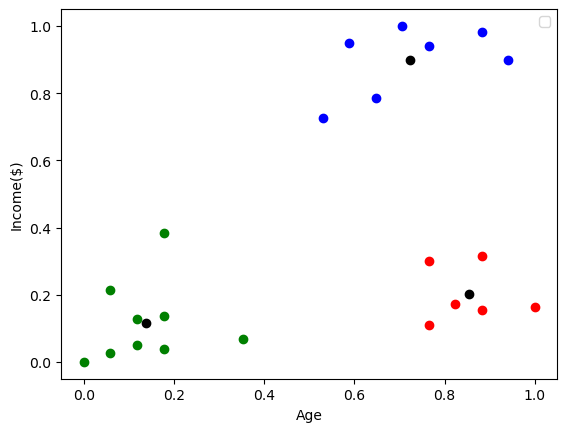

In [106]:
df1=df[df.Cluster2==0]
df2=df[df.Cluster2==1]
df3=df[df.Cluster2==2]

plt.scatter(df1['Age'],df1['Income($)'],color='Green')
plt.scatter(df2['Age'],df2['Income($)'],color='Red')
plt.scatter(df3['Age'],df3['Income($)'],color='Blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [105]:
#Centroid of the clusters
km.cluster_centers_[:,0]

array([0.1372549 , 0.85294118, 0.72268908])

1. So this is a easy bitch task when comes to easy with 2-3 features 
2. but in real life dataset we have 20-30 features its not a easy task
3. In this case elbow technique will help

**Draw Elblow plot**

In [138]:
#Lets define 
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)# Cretae new model
    km.fit(df[['Age','Income($)']]) # Create groups for cluster
    sse.append(km.inertia_)# Find out sum of squared error (SSE)

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

In [139]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.2105547899547249,
 0.16858512236029757,
 0.1326541982724516,
 0.11304517838728051]

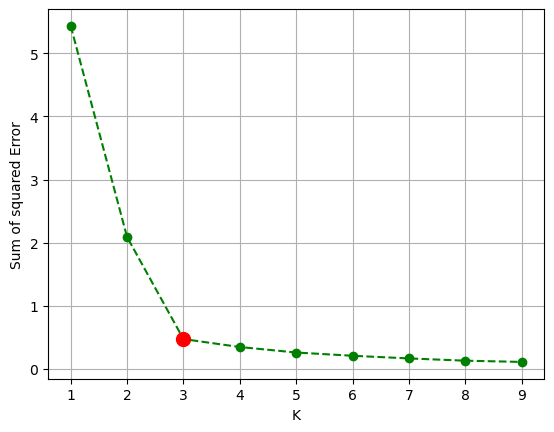

In [147]:
# Draw Elboow plt 
plt.xlabel('K')
plt.ylabel('Sum of squared Error')
plt.plot(k_range,sse,marker='o',color='Green',linestyle='--')
plt.scatter(3,sse[k_range.index(3)], color='red', marker='o', s=100,label='K=3', zorder=3)
plt.grid(True)

#Here K=3 is good cluster
#BY THIS METHOD WE CAN FIND OUT HOW MANY CLUSTER WE NEED TO FIND OUT
#HERE WE CAN START WITH N_CLUSTERS=3 DURING KMEANS

# Exercise 

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

### 1. Preprocessing 

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
import pandas as pd

In [18]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### 2. Min_Max scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [23]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])


In [25]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


### 3. Creating clusters

In [39]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [40]:
df['cluster']=km.fit_predict(df)
df.head()

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [41]:
df.cluster.unique()

array([1, 2, 0])

In [34]:
from matplotlib import pyplot as plt

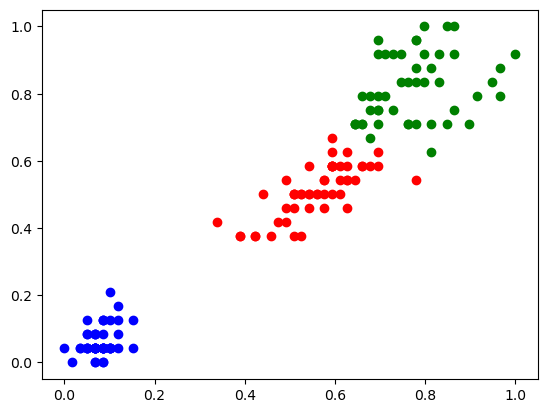

In [38]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='b')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='g')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='r')


### 4. Draw Elbow Plot

In [46]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

In [47]:
sse

[128.26168655306054,
 38.22615884825026,
 1.7018746881920965,
 1.2555382834168467,
 0.8535683225340073,
 0.6798101576314028,
 0.565127345570398,
 0.4954566390833979,
 0.4154845785171637]

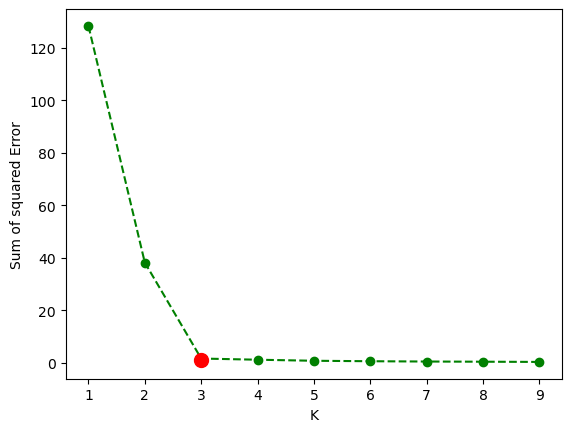

In [62]:
plt.xlabel('K')
plt.ylabel('Sum of squared Error')
plt.plot(k_range,sse,marker='o',linestyle ='--',color='g')
plt.scatter(3,sse[3],color='r',marker='o',s=100,zorder=3)

**K=3 is good cluster**